In [1]:
from test_materials import paramarama, shhhh
from philoso_py import ModelFactory
from collections import defaultdict, OrderedDict
import numpy as np
import pandas as pd
import torch

In [2]:
class ExploreActions:
    def __init__(self, params=None):
        self.mf = ModelFactory()
        self.model = self.make_model_from_json(params=params)

    @shhhh
    def make_model_from_json(self, params=None):
        params = paramarama if params is None else params
        return self.mf.from_json(params)

    def __getitem__(self, key):
        return self.model.agents[0].actions[key]

In [3]:
ea = ExploreActions()
gpn = ea['gp_new']
gpn.action_space

Dict('gp_register': Discrete(2), 'long_box': Box(-inf, inf, (14,), float32))

In [4]:
action = gpn.process_action(
    OrderedDict({
        'gp_register': torch.tensor([[0]]),
        'long_box': torch.tensor([[
            0.0, 0.0, 0.0, 0.0,
            0.0, 0.0, 0.0, 0.0,
            0.0, 0.0, 0.0, 0.0,
            0.0, 12.0
        ]])
    })
)
gpn._interpret(*action)

{'gp_register': 0,
 'obs_centre': 0.0,
 'obs_log_radius': 0.0,
 'obs_width': 2.0,
 'tf_choices': None,
 'tf_weights': None,
 'sra_tf_log_float_const_sd': array([0.], dtype=float32),
 'temp_coeff': 1.0,
 'sb_weights': array([1.]),
 'pop': 26,
 'crossover_rate': 0.5,
 'mutation_rate': 0.5,
 'mutation_sd': 0.0,
 'max_depth': 9,
 'max_size': 27,
 'episode_len': 26,
 'elitism': 13,
 'mutator_weights_0': 0.3333333333333333,
 'mutator_weights_1': 0.6666666666666666}

In [5]:
def raw_2_mut_sd(raw):
    action = gpn.process_action(
        OrderedDict({
            'gp_register': torch.tensor([[1]]),
            'long_box': torch.tensor([[
                0.5, -0.5, 2.0,     # pop, max_size, episode_len
                2.0,                # crossover_rate
                -2.0,               # mutation_rate
                raw,                # log_mutation_sd -> mutation_sd
                18.0,               # max_depth
                0.0,
                0.0, 0.0, 0.0, 0.0,
                1.0, 1.0
            ]])
        })
    )
    return gpn._interpret(*action)['mutation_sd']


In [18]:
X = np.arange(-19.1, -18.9, 0.00001)
Y = np.array([raw_2_mut_sd(x) for x in X])

<Axes: xlabel='raw_mut_sd', ylabel='mut_sd'>

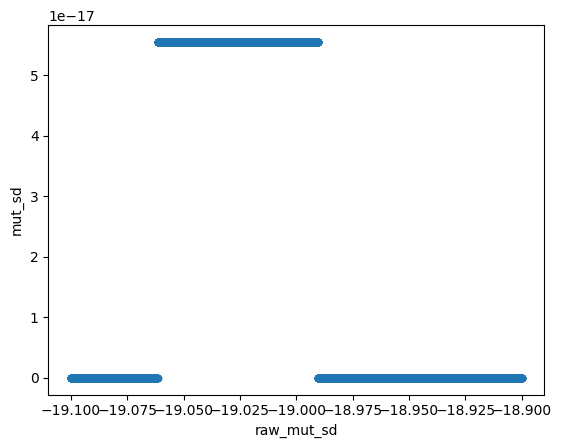

In [19]:
pd.DataFrame({'raw_mut_sd': X, 'mut_sd': Y}).plot.scatter('raw_mut_sd', 'mut_sd')

In [20]:
Y

array([0., 0., 0., ..., 0., 0., 0.], shape=(20001,))

In [21]:
X

array([-19.1    , -19.09999, -19.09998, ..., -18.90002, -18.90001,
       -18.9    ], shape=(20001,))

In [22]:
X[Y>0]

array([-19.06154, -19.06153, -19.06152, ..., -18.99037, -18.99036,
       -18.99035], shape=(7120,))

In [23]:
gpn.guardrails

GuardrailManager(<function guardrails.GuardrailManager.__init__.<locals>.<lambda>()>,
                 {'pop': TanhGuardrail([-18.990341103219276, 18.990341103219276], [2, inf]),
                  'max_size': TanhGuardrail([-18.990341103219276, 18.990341103219276], [3, inf]),
                  'episode_len': TanhGuardrail([-18.990341103219276, 18.990341103219276], [2, inf]),
                  'crossover_rate': TanhGuardrail([-18.990341103219276, 18.990341103219276], [0, 1]),
                  'mutation_rate': TanhGuardrail([-18.990341103219276, 18.990341103219276], [0, 1]),
                  'log_mutation_sd': TanhGuardrail([-18.990341103219276, -18.990340000004153], [-11.512925464970229, 0.0]),
                  'max_depth': TanhGuardrail([-18.990341103219276, 18.990341103219276], [1, inf]),
                  'elitism': TanhGuardrail([-18.990341103219276, 18.990341103219276], [0, 1]),
                  'temp_coeff': TanhGuardrail([-18.990341103219276, 18.990341103219276], [0, inf]),
 